# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL by month** per seller

#### Costs
_Estimated_ **reputation costs** of orders with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We make an assumption about the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
'2 stars': 50
'3 stars': 40
'4 stars': 0
'5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that have ever joined the platform, as well as with the square root of the total cumulated number of items that were ever sold.  

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both the number of sellers to manage and the number of sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores.  
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`. 
- Because the carrier's delivery time is out of Olist's direct control, improving it is not a quick-win recommendation.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments in the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below.

💪 But feel free to investigate into other hypothesis instead with part 3.

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worst sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` the seller brings
- the `review_costs` associated with the seller's bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need.

⚠️ Don't start from scratch, update your existing package! 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Write a function that will calculate IT costs based on two parameters: number of sellers and number of items.

2️⃣ Load the sellers data and sort them by decreasing profits (before IT costs).

3️⃣ Calculate profits:
   - Calculate the cumulative profits for each row.
   - Calculate the cumulative IT costs for each row using the function you defined before.
   - Calculate the cumulative net profit for each row.

4️⃣ Plot your results, and analyze them.

5️⃣ Determine the optimum number of sellers to keep, based on profits before and after IT costs. (Hint: look up `np.argmax`). What would have been the impact on:
   - Net profit after IT costs?
   - Net profit before IT costs
   - IT costs?
   - Total revenues?
   - Number of sellers?
   - Number of items sold?

6️⃣ How important were the IT costs in your analysis?

## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after a honeymoon period of a few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from olist.data import Olist
from olist.order import Order
from olist.seller_updated import Seller


In [2]:
olist = Olist()
data = olist.get_data()
order = Order()
Seller = Seller()

In [3]:
sellers_review = Seller.get_training_data()
sellers_review

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


In [4]:
averaged_data = sellers_review.groupby('review_score').agg({'profits': 'mean'}).reset_index()
averaged_data

,review_score,profits
0,1.000000,-55.543787
1,1.250000,222.520000
2,1.263158,-903.290000
3,1.500000,63.151286
4,1.666667,373.663500
...,...,...
749,4.909091,327.552667
750,4.923077,380.274500
751,4.947368,1006.964000
752,4.950000,718.200000


In [5]:
averaged_data = sellers_review.groupby('months_on_olist').agg({'profits': 'mean'}).reset_index()
averaged_data

,months_on_olist,profits
0,0.0,6.869169
1,1.0,87.724736
2,2.0,164.137894
3,3.0,273.799140
4,4.0,308.616652
5,5.0,376.017423
6,6.0,543.365276
7,7.0,476.986243
8,8.0,651.913822
9,9.0,657.916911


In [6]:
bins = [0, 1, 2, 3, 4, 5]  # Ranges for the review scores
labels = ['1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars']  # Labeling the ranges
sellers_review['review_score_range'] = pd.cut(sellers_review['review_score'], bins=bins, labels=labels, right=True)

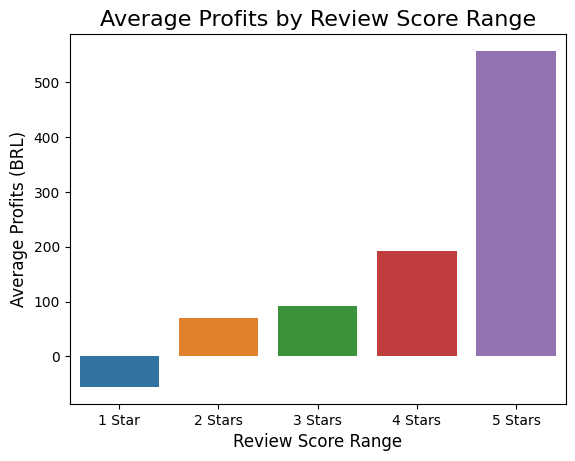

In [7]:
# Group the data by the review score range and calculate the average profits for each range
averaged_data = sellers_review.groupby('review_score_range').agg({'profits': 'mean'}).reset_index()

# Create the bar plot
ax = sns.barplot(data=averaged_data, x='review_score_range', y='profits')

# Adding title and axis labels in English
plt.title('Average Profits by Review Score Range', fontsize=16)
plt.xlabel('Review Score Range', fontsize=12)
plt.ylabel('Average Profits (BRL)', fontsize=12)

plt.show()


In [8]:
sellers_less_profit = sellers_review[sellers_review['profits'] < 0]
sellers_less_profit

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits,review_score_range
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.000000,100,1,1,1.000000,167.99,16.799,-83.201,1 Star
25,2a1348e9addc1af5aaa619b1a3679d6b,belo horizonte,MG,0.000000,27.203553,2017-01-14 01:30:17,2018-08-02 16:30:58,19.0,0.352941,0.333333,3.117647,2090,52,55,1.057692,2843.00,1804.300,-285.700,4 Stars
30,e9e446d01bd10a97a8ffcfc4a3a20cb2,sao paulo,SP,0.000000,5.304830,2018-06-06 02:53:58,2018-07-08 20:10:19,1.0,0.250000,0.500000,3.500000,140,4,4,1.000000,60.05,86.005,-53.995,4 Stars
45,8444e55c1f13cd5c179851e5ca5ebd00,congonhal,MG,0.000000,21.292399,2017-03-13 23:13:57,2018-07-06 02:55:16,16.0,0.313131,0.363636,3.262626,3620,99,109,1.101010,22873.21,3567.321,-52.679,4 Stars
57,b7ba853e9551f4558440881fd3e5c815,santo antonio da patrulha,RS,14.000833,34.955995,2016-10-06 15:56:40,2016-10-06 16:52:11,0.0,1.000000,0.000000,1.000000,200,2,2,1.000000,376.80,37.680,-162.320,1 Star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2904,586a871d4f1221763fddb6ceefdeb95e,porto alegre,RS,45.434039,68.621146,2017-01-28 04:35:50,2017-01-28 04:35:50,0.0,1.000000,0.000000,1.000000,100,1,2,2.000000,198.00,19.800,-80.200,1 Star
2919,4342d4b2ba6b161468c63a7e7cfce593,rio de janeiro,RJ,0.000000,15.676088,2017-12-23 14:32:24,2018-07-25 11:30:19,7.0,0.894737,0.052632,1.263158,1750,20,20,1.000000,2867.10,846.710,-903.290,2 Stars
2934,918f6fbcf3ab724d805867303e593a1b,valinhos,SP,0.000000,5.639140,2017-02-20 21:55:11,2017-03-02 01:30:18,0.0,0.000000,0.500000,4.000000,40,2,3,1.500000,79.70,7.970,-32.030,4 Stars
2950,63704069d9bd3a75c1cf59babe56004a,jundiai,SP,2.295579,18.275509,2018-06-09 02:57:22,2018-06-09 02:57:22,0.0,1.000000,0.000000,1.000000,100,1,1,1.000000,59.30,5.930,-94.070,1 Star


In [9]:
grouped = sellers_negative_profit.groupby('review_score')['wait_time'].mean().reset_index()

sns.regplot(
    data=sellers_less_profit,
    x='review_score',
    y='wait_time',
    lowess=True,
    scatter=False

SyntaxError: incomplete input (404856364.py, line 8)

In [ ]:
sellers_positive_profit = sellers_review[sellers_review['profits'] > 0]
sellers_positive_profit

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.0,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.0,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.0,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.0,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
5,c240c4061717ac1806ae6ee72be3533b,rio de janeiro,RJ,0.0,6.056956,2018-05-08 17:55:23,2018-05-08 17:55:23,0.0,0.000000,0.000000,4.00,0,1,1,1.000000,59.90,5.990,5.990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.0,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.0,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.0,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.0,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700


<AxesSubplot:xlabel='review_score', ylabel='wait_time'>

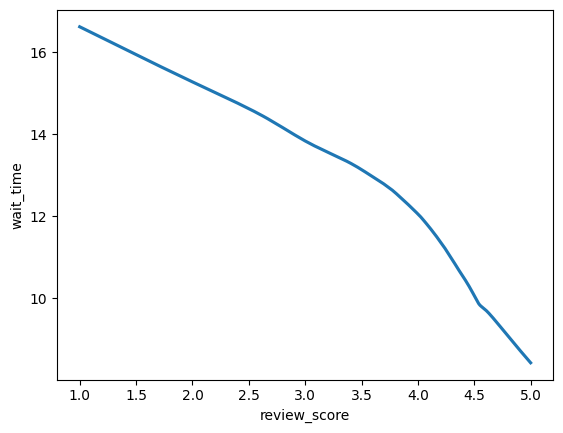

In [ ]:
grouped = sellers_positive_profit.groupby('review_score')['wait_time'].mean().reset_index()

sns.regplot(
    data=sellers_positive_profit,
    x='review_score',
    y='wait_time',
    lowess=True,
    scatter=False)

In [ ]:
sns.lineplot(data=flights, x="year", y="passengers", hue="month", style="month"

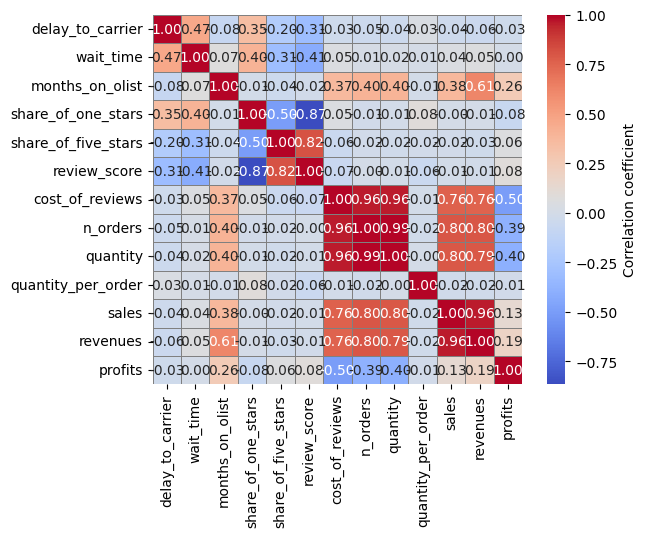

In [ ]:
corr_matrix = sellers_review.corr()

# Criando o heatmap
sns.heatmap(corr_matrix,
            annot=True,              # Anotar os valores nas células
            fmt='.2f',               # Formato de exibição dos números
            cmap='coolwarm',         # Paleta de cores
            linewidths=0.5,          # Espessura das linhas de separação
            linecolor='gray',        # Cor das linhas de separação
            cbar_kws={'label': 'Correlation coefficient'},  # Título da barra de cores
            square=True)             # Forçar gráfico quadrado

# Exibindo o gráfico
plt.show()

In [ ]:
grouped = sellers_review.groupby('review_score')['dalay_to_carrier'].mean().reset_index()

sns.regplot(
    data=sellers_review,
    x='review_score',
    y='dalay_to_carrier',
    lowess=True,
    scatter=False)

KeyError: 'Column not found: dalay_to_carrier'

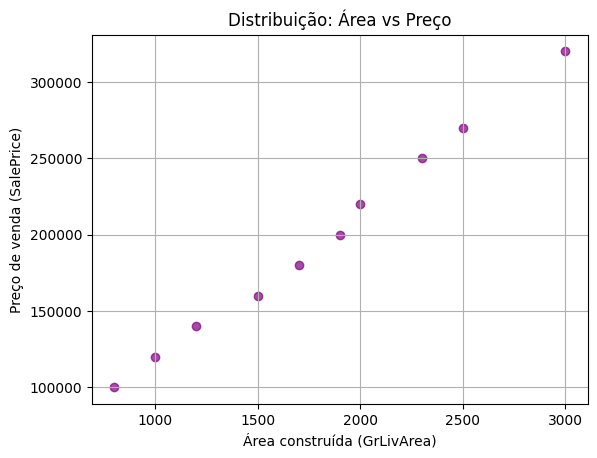

In [2]:
import pandas as pd

# Dados fictícios
data = pd.DataFrame({
    'GrLivArea': [800, 1000, 1200, 1500, 1700, 1900, 2000, 2300, 2500, 3000],
    'SalePrice': [100000, 120000, 140000, 160000, 180000, 200000, 220000, 250000, 270000, 320000]
})
plt.scatter(data['GrLivArea'], data['SalePrice'], color='purple', alpha=0.7)

# Labels e título
plt.xlabel("Área construída (GrLivArea)")
plt.ylabel("Preço de venda (SalePrice)")
plt.title("Distribuição: Área vs Preço")
plt.grid(True)

# Exibir
plt.show()

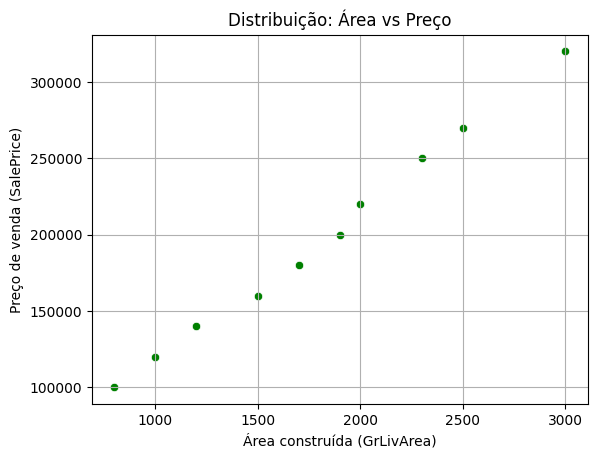

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot com Seaborn
sns.scatterplot(data=data, x='GrLivArea', y='SalePrice', color='green')

# Labels e título
plt.xlabel("Área construída (GrLivArea)")
plt.ylabel("Preço de venda (SalePrice)")
plt.title("Distribuição: Área vs Preço")
plt.grid(True)

# Exibir
plt.show()

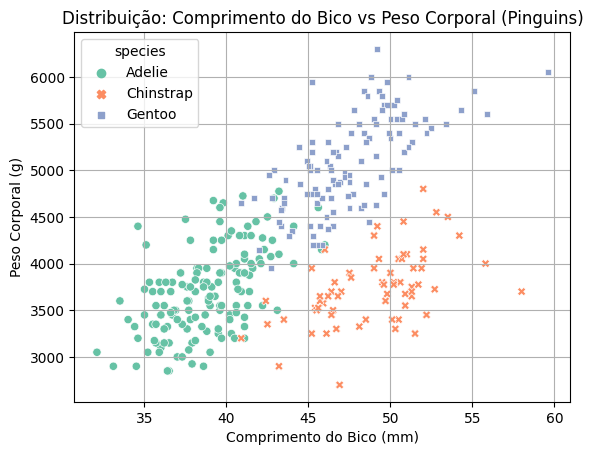

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando o dataset dos pinguins
penguins = sns.load_dataset("penguins")

# Remover linhas com valores ausentes (evita erro no gráfico)
penguins = penguins.dropna()

# Gráfico de dispersão
sns.scatterplot(
    data=penguins,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species',        # Diferencia cores por espécie
    style='species',      # Diferencia com marcadores também
    palette='Set2'        # Paleta de cores agradável
)

# Adicionando rótulos
plt.title("Distribuição: Comprimento do Bico vs Peso Corporal (Pinguins)")
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Peso Corporal (g)")
plt.grid(True)

# Exibindo o gráfico
plt.show()

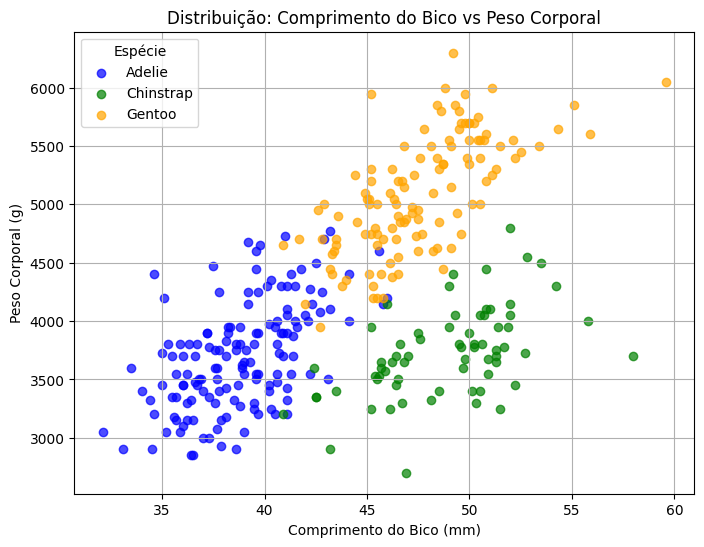

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados e limpar
penguins = sns.load_dataset("penguins").dropna()

# Separar por espécie
species_list = penguins['species'].unique()
colors = ['blue', 'green', 'orange']

# Criar gráfico
plt.figure(figsize=(8,6))

for species, color in zip(species_list, colors):
    subset = penguins[penguins['species'] == species]
    plt.scatter(subset['bill_length_mm'], subset['body_mass_g'], label=species, color=color, alpha=0.7)

# Labels
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Peso Corporal (g)")
plt.title("Distribuição: Comprimento do Bico vs Peso Corporal")
plt.legend(title="Espécie")
plt.grid(True)
plt.show()

In [6]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

train_sizes = [25, 50, 75, 100, 250, 500, 750, 1000, 1150]

# Coleta os scores
train_sizes, train_scores, test_scores = learning_curve(
    estimator=LinearRegression(), X=X, y=y, train_sizes=train_sizes, cv=5)

# Médias
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Gráfico
plt.plot(train_sizes, train_scores_mean, label='Training score', color='blue')
plt.plot(train_sizes, test_scores_mean, label='Test score', color='orange')
plt.xlabel("Tamanho do treino")
plt.ylabel("R² score")
plt.title("Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'X' is not defined

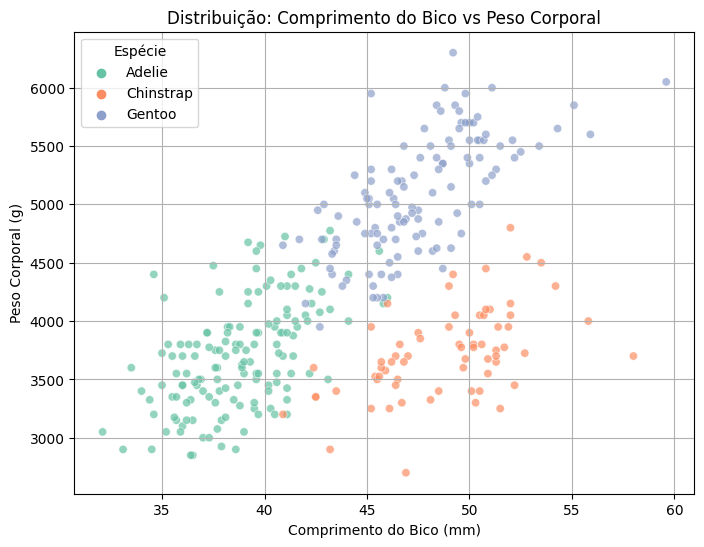

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar e limpar dados
penguins = sns.load_dataset("penguins").dropna()

# Criar gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=penguins,
    x='bill_length_mm',
    y='body_mass_g',
    hue='species',         # Categoriza por espécie (cor)
    palette='Set2',        # Paleta de cores (opcional)
    alpha=0.7
)

# Labels
plt.xlabel("Comprimento do Bico (mm)")
plt.ylabel("Peso Corporal (g)")
plt.title("Distribuição: Comprimento do Bico vs Peso Corporal")
plt.legend(title="Espécie")
plt.grid(True)
plt.show()
